In [37]:
import pandas as pd
import numpy as np

In [38]:
df= pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Que 1

Create a user-defined function to compute pairwise Pearson correlation coefficients. The function takes two variables as arguments and returns the correlation coefficient between them. ( 6 points)

In [26]:
def pearson(x, y):
    corr= x.corr(y)
    return corr
pearson(df[input()], df[input()])

# Que 2

plot the graphs to visualize the correlation between two variables and also write a code to visualize the correlation matrix. (6 points).

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

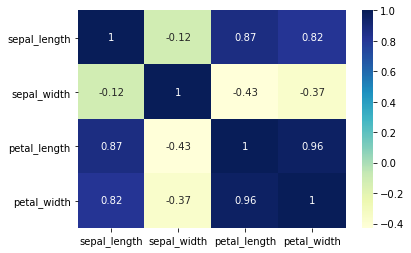

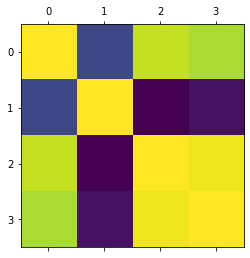

In [40]:
def visualization(dataframe):
    
    numeric_columns = []
    
    for clmn in dataframe:
        if dataframe[clmn].dtype in ["int64", "float64"]:
            numeric_columns.append(clmn)
    
    data_frame = pd.DataFrame(columns=numeric_columns, index=numeric_columns, dtype="float")
    
    for column in numeric_columns:
        for row in numeric_columns:
            data_frame.loc[row ,column] = pearson(dataframe[column], dataframe[row])
    
    sns.heatmap(data_frame, cmap='YlGnBu', annot=True)
    
    plt.matshow(data_frame)
    plt.show()
    

    
df = pd.read_csv('iris.csv')

visualization(df.copy())


# Que 3

Perform z-score standardization on the data. (6 points)


In [34]:
cols= list(df)
cols.remove('species')
for col in cols:
    col_zscore= col+ '_zscore'
    df[col_zscore]=(df[col]- df[col].mean())/df[col].std()
df

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_zscore,sepal_width_zscore,petal_length_zscore,petal_width_zscore
0,5.1,3.5,1.4,0.2,setosa,-0.897674,1.015602,-1.335752,-1.311052
1,4.9,3.0,1.4,0.2,setosa,-1.139200,-0.131539,-1.335752,-1.311052
2,4.7,3.2,1.3,0.2,setosa,-1.380727,0.327318,-1.392399,-1.311052
3,4.6,3.1,1.5,0.2,setosa,-1.501490,0.097889,-1.279104,-1.311052
4,5.0,3.6,1.4,0.2,setosa,-1.018437,1.245030,-1.335752,-1.311052
...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1.034539,-0.131539,0.816859,1.443994
146,6.3,2.5,5.0,1.9,virginica,0.551486,-1.278680,0.703564,0.919223
147,6.5,3.0,5.2,2.0,virginica,0.793012,-0.131539,0.816859,1.050416
148,6.2,3.4,5.4,2.3,virginica,0.430722,0.786174,0.930154,1.443994


# Que 4

Compute covariance matrix for the standardized data. (6 points)

In [11]:
data= np.array([df['sepal_length_zscore'], df['sepal_width_zscore'],df['petal_length_zscore'],df['petal_width_zscore']])
matrix= np.cov(data, bias= True)
print(matrix)

[[ 0.99333333 -0.11678599  0.86594208  0.81248819]
 [-0.11678599  0.99333333 -0.42558384 -0.36368509]
 [ 0.86594208 -0.42558384  0.99333333  0.95644633]
 [ 0.81248819 -0.36368509  0.95644633  0.99333333]]


# Que 5

Find the eigenvalues and eigenvectors for the covariance matrix and print them in descending order. (6 points)

In [36]:
from numpy.linalg import eig
eigenvalues, eigenvectors= eig(matrix)
eigenvalues[::-1].sort()
eigenvectors[::1].sort()
print(eigenvectors)
print('eigenvalues:',eigenvalues)

[[-0.71956635 -0.37741762  0.26128628  0.52106591]
 [-0.92329566 -0.26934744 -0.12350962  0.24438178]
 [-0.80144925 -0.02449161  0.14212637  0.5804131 ]
 [-0.06694199  0.52359713  0.56485654  0.63427274]]
eigenvalues: [2.89904116 0.90793693 0.1457785  0.02057674]
